In [1]:
import _functions

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import joblib

# PREPROCESSING
label -> dummies

In [3]:
df_TESS = pd.read_csv('TESS_mfcc20_labels.csv')
df_RAVDESS = pd.read_csv('RAVDESS_mfcc20_labels.csv')

In [4]:
df = pd.concat([df_TESS, df_RAVDESS], ignore_index=True)

In [5]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True) # shuffle

In [6]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,label
0,-484.28152,190.620290,-19.982420,-7.379053,6.886962,9.451779,-32.918880,-4.751101,-5.306405,-14.028688,...,-15.967937,5.257388,-3.434334,-7.524569,2.931761,-11.234414,-19.252283,4.021437,2.462507,surprise
1,-423.34738,128.137880,-38.736576,-2.538193,-5.109863,-5.815287,-25.097466,4.818570,-9.883142,-21.609966,...,-9.362042,-5.840129,-11.062403,-23.802397,-13.001789,-21.210798,-9.840059,-8.376751,-7.290752,happy
2,-413.89697,119.661860,45.043938,16.279648,-25.634290,18.136494,32.434470,-10.117468,-7.974312,-4.156151,...,-5.352430,-9.005486,6.942813,-21.959146,-5.929955,1.105549,-12.421453,5.662510,-12.030071,sad
3,-401.95910,107.207634,-33.677914,6.929764,-39.821465,-9.657510,-24.399527,7.633095,-8.682779,-1.229950,...,-17.266747,2.633279,-18.141802,-13.803773,-5.842812,-22.223478,-1.547133,-15.708506,-12.984270,fear
4,-1130.40670,0.620979,0.601525,0.380030,0.384768,-0.146482,-0.242339,0.198292,-0.088879,-0.029896,...,0.228551,-0.098887,-0.080663,0.048334,0.038808,-0.045400,-0.018891,0.030010,0.016930,sad


In [7]:
labels = df['label'].unique()
labels

array(['surprise', 'happy', 'sad', 'fear', 'angry', 'disgust', 'neutral'],
      dtype=object)

In [8]:
# Create a LabelEncoder and fit it with the original labels
label_encoder = LabelEncoder()
label_encoder.fit(labels)

LabelEncoder()

In [9]:
joblib.dump(label_encoder, 'label_encoder.joblib')

['label_encoder.joblib']

In [10]:
df = pd.get_dummies(df, columns=['label'])

In [11]:
label_columns = [col for col in df.columns if col.startswith('label_')]

In [12]:
X = df.drop(columns=label_columns)
Y = df[label_columns]

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.2
)

In [15]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
26590,-1131.37080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
53394,-919.65220,44.908850,-5.362316,-4.193896,-1.834440,0.284486,3.343301,7.022994,5.792050,4.163376,-1.051246,-6.062087,-1.055623,3.465932,4.182151,1.542965,2.783791,2.954341,0.796306,0.564585
126302,-408.07970,57.973732,-28.480259,38.976223,-5.261197,24.992004,-28.222036,-18.995626,-26.523450,-9.969932,-12.384243,-3.825767,-12.920526,-5.374762,-11.175908,3.390094,-12.037504,-8.470293,-13.263859,4.234130
19184,-843.74010,79.529530,28.709673,17.944567,14.106937,18.808886,18.259430,14.785828,2.230852,-0.979477,2.839816,7.823214,5.839075,-1.643686,-2.631466,-1.730442,0.880023,2.419355,2.321020,-0.026350
74654,-1131.37080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179012,-460.23325,93.906710,8.086273,29.634676,17.326754,-4.357448,-2.397666,0.072413,-15.604095,-11.420159,-3.908278,-4.451498,0.286398,-1.252645,4.317724,0.303690,0.026494,-5.804080,4.645378,0.511471
13176,-468.77860,168.973570,-7.990797,7.694526,-6.977994,3.875217,-36.755074,13.214391,9.050200,5.286191,-0.850760,-10.708394,-3.017285,4.558937,-2.168036,-4.656518,-8.727324,5.323712,1.992514,-6.753874
132817,-343.62225,133.646880,-46.055378,-46.822514,-8.904274,11.158270,-23.951406,20.932247,-5.712228,4.448633,5.256182,-17.218544,-1.675095,-16.540770,3.450248,4.238048,-4.247785,-10.888510,7.877318,-9.005118
129076,-855.21606,67.669940,22.887667,16.047316,10.964321,13.857427,12.331087,11.692031,8.257590,4.887327,3.168072,2.223361,3.916672,-0.511747,-0.095572,3.875463,0.096576,-1.596386,0.007561,-3.991977


In [16]:
Y_train

,label_angry,label_disgust,label_fear,label_happy,label_neutral,label_sad,label_surprise
26590,0,0,0,0,1,0,0
53394,1,0,0,0,0,0,0
126302,0,0,0,1,0,0,0
19184,0,0,0,1,0,0,0
74654,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
179012,0,0,0,0,0,1,0
13176,0,1,0,0,0,0,0
132817,0,1,0,0,0,0,0
129076,0,0,1,0,0,0,0


# MODEL 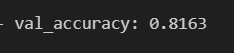

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score

In [18]:
# Reshape the data for LSTM
X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [20]:
X_train_lstm[0]

array([[-1131.3708,     0.    ,     0.    ,     0.    ,     0.    ,
            0.    ,     0.    ,     0.    ,     0.    ,     0.    ,
            0.    ,     0.    ,     0.    ,     0.    ,     0.    ,
            0.    ,     0.    ,     0.    ,     0.    ,     0.    ]])

In [24]:
Y_train.shape

(177073, 7)

In [59]:
# lstm_model = Sequential([
#     LSTM(128, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
#     Dropout(0.2),
#     LSTM(128, return_sequences=False),
#     Dropout(0.2),
#     Dense(64, activation='relu'),
#     Dropout(0.2),
#     Dense(Y_train.shape[1], activation='softmax')
# ]) # accuracy 0.48

# lstm_model = Sequential([
#     LSTM(128, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
#     Dropout(0.3),
#     LSTM(128, return_sequences=True),
#     Dropout(0.3),
#     LSTM(64, return_sequences=False),
#     Dropout(0.3),
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(Y_train.shape[1], activation='softmax')
# ]) # accuracy 0.47

# lstm_model = Sequential([
#     LSTM(200, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
#     Dropout(0.2),
#     LSTM(200, return_sequences=True),
#     Dropout(0.2),
#     LSTM(100, return_sequences=False),
#     Dropout(0.2),
#     Dense(100, activation='relu'),
#     Dropout(0.2),
#     Dense(Y_train.shape[1], activation='softmax')
# ]) # 0.6

# lstm_model = Sequential([
#     LSTM(200, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
#     Dropout(0.2),
#     LSTM(200, return_sequences=True),
#     Dropout(0.2),
#     LSTM(200, return_sequences=True),
#     Dropout(0.2),
#     LSTM(100, return_sequences=False),
#     Dropout(0.2),
#     Dense(100, activation='relu'),
#     Dropout(0.2),
#     Dense(Y_train.shape[1], activation='softmax')
# ]) # 0.58

# lstm_model = Sequential([
#     LSTM(300, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
#     Dropout(0.1),
#     LSTM(200, return_sequences=True),
#     Dropout(0.1),
#     LSTM(100, return_sequences=False),
#     Dropout(0.1),
#     Dense(100, activation='relu'),
#     Dropout(0.1),
#     Dense(Y_train.shape[1], activation='softmax')
# ]) # 0.7

# lstm_model = Sequential([
#     LSTM(300, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
#     Dropout(0.1),
#     LSTM(300, return_sequences=True),
#     Dropout(0.1),
#     LSTM(200, return_sequences=False),
#     Dropout(0.1),
#     Dense(100, activation='relu'),
#     Dropout(0.1),
#     Dense(Y_train.shape[1], activation='softmax')
# ]) # 0.73

# lstm_model = Sequential([
#     LSTM(500, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
#     Dropout(0.1),
#     LSTM(400, return_sequences=True),
#     Dropout(0.1),
#     LSTM(400, return_sequences=False),
#     Dropout(0.1),
#     Dense(200, activation='relu'),
#     Dropout(0.1),
#     Dense(Y_train.shape[1], activation='softmax')
# ])  # 0.8

# lstm_model = Sequential([
#     LSTM(600, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
#     Dropout(0.1),
#     LSTM(500, return_sequences=True),
#     Dropout(0.1),
#     LSTM(600, return_sequences=False),
#     Dropout(0.1),
#     Dense(300, activation='relu'),
#     Dropout(0.1),
#     Dense(Y_train.shape[1], activation='softmax')
# ]) # 0.79

lstm_model = Sequential([
    LSTM(500, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.1),
    LSTM(500, return_sequences=True),
    Dropout(0.1),
    LSTM(500, return_sequences=False),
    Dropout(0.1),
    Dense(200, activation='relu'),
    Dropout(0.1),
    Dense(Y_train.shape[1], activation='softmax')
]) # 0.81 -> best

# lstm_model = Sequential([
#     LSTM(500, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
#     Dropout(0.2),
#     LSTM(300, return_sequences=True),
#     Dropout(0.1),
#     LSTM(500, return_sequences=False),
#     Dropout(0.1),
#     Dense(100, activation='relu'),
#     Dropout(0.1),
#     Dense(Y_train.shape[1], activation='softmax')
# ]) # 0.76

# Y_train.shape[1] == number of classes
# total time for trying all these structure : 12 hours

In [60]:
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
lstm_model.fit(X_train_lstm, Y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, Y_test))

Epoch 1/10
5534/5534 [==============================] - 421s 74ms/step - loss: 1.5523 - accuracy: 0.3702 - val_loss: 1.4168 - val_accuracy: 0.4277
Epoch 2/10
5534/5534 [==============================] - 526s 95ms/step - loss: 1.3696 - accuracy: 0.4531 - val_loss: 1.2719 - val_accuracy: 0.4988
Epoch 3/10
5534/5534 [==============================] - 479s 87ms/step - loss: 1.2325 - accuracy: 0.5132 - val_loss: 1.1388 - val_accuracy: 0.5524
Epoch 4/10
5534/5534 [==============================] - 455s 82ms/step - loss: 1.0964 - accuracy: 0.5696 - val_loss: 0.9446 - val_accuracy: 0.6324
Epoch 5/10
5534/5534 [==============================] - 418s 75ms/step - loss: 0.9660 - accuracy: 0.6240 - val_loss: 0.8437 - val_accuracy: 0.6732
Epoch 6/10
5534/5534 [==============================] - 409s 74ms/step - loss: 0.8542 - accuracy: 0.6698 - val_loss: 0.7131 - val_accuracy: 0.7263
Epoch 7/10
5534/5534 [==============================] - 394s 71ms/step - loss: 0.7649 - accuracy: 0.7073 - val_loss: 0

In [62]:
joblib.dump(lstm_model, 'model_lstm.joblib')

['model_lstm.joblib']